# Exploratory Data Analysis - Sports

Performer - **Naman Sahu**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_match= pd.read_csv('/content/drive/MyDrive/data/matches.csv')
df_score=pd.read_csv('/content/drive/MyDrive/data/deliveries.csv')
df_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df_score.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
print(df_match.info())
print(df_score.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
df_match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
df_match['umpire1'].head(20)

0               AY Dandekar
1            A Nand Kishore
2               Nitin Menon
3              AK Chaudhary
4                       NaN
5                A Deshmukh
6               Nitin Menon
7              AK Chaudhary
8               AY Dandekar
9               Nitin Menon
10               A Deshmukh
11    KN Ananthapadmanabhan
12           A Nand Kishore
13              AY Dandekar
14                 YC Barde
15           A Nand Kishore
16    KN Ananthapadmanabhan
17              Nitin Menon
18              AY Dandekar
19                   S Ravi
Name: umpire1, dtype: object

# Match Data set

In [8]:
df_match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
df_match['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

**Team Won by Maximum Runs**

In [10]:
df_match.iloc[df_match['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [11]:
print("Team won by Maximum Runs is :",df_match.iloc[df_match['win_by_runs'].idxmax()]['winner'])

Team won by Maximum Runs is : Mumbai Indians


**Team won by Maximum Wickets**

In [12]:
df_match.iloc[df_match['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [13]:
print("Team won by Maximum wickets is :",df_match.iloc[df_match['win_by_wickets'].idxmax()]['winner'])

Team won by Maximum wickets is : Kolkata Knight Riders


**Team won by Minimun Runs**

In [14]:
df_match.iloc[df_match['win_by_runs'].idxmin()]

id                                                       2
season                                                2017
city                                                  Pune
date                                            2017-04-06
team1                                       Mumbai Indians
team2                               Rising Pune Supergiant
toss_winner                         Rising Pune Supergiant
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                              Rising Pune Supergiant
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

In [15]:
print("Team won by Minimum Runs is :",df_match.iloc[df_match['win_by_runs'].idxmin()]['winner'])

Team won by Minimum Runs is : Rising Pune Supergiant


**Team won by Minimun Wickets**

In [16]:
df_match.iloc[df_match['win_by_wickets'].idxmin()]

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

In [17]:
print("Team won by Maximum wickets is :",df_match.iloc[df_match['win_by_wickets'].idxmin()]['winner'])

Team won by Maximum wickets is : Sunrisers Hyderabad


**Most number of matches in any season**

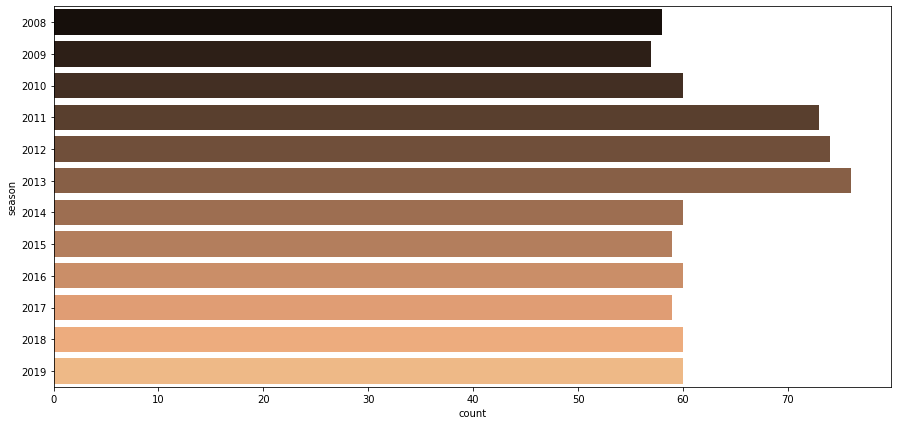

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(y='season',data=df_match,palette='copper')
plt.show()

In 2013, We had Most Number of matches

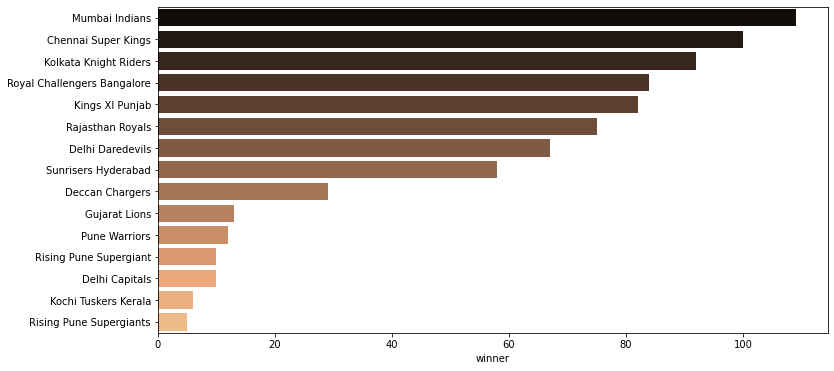

In [19]:
plt.figure(figsize=(12,6))
dt = df_match.winner.value_counts()
sns.barplot(y = dt.index, x = dt, orient='h',palette='copper')
plt.show()

**Mumbai Indian** are the  winner in most matches

**Most number of Man of The Match by any Player**

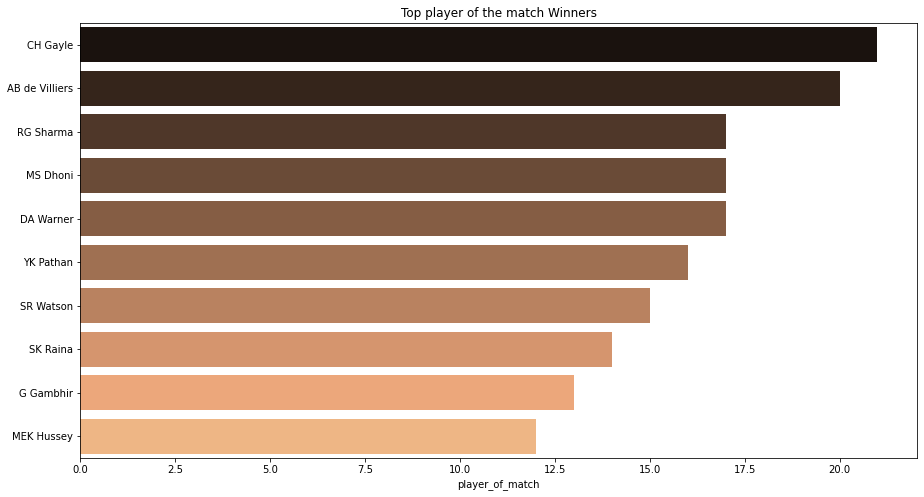

In [20]:
top_players = df_match.player_of_match.value_counts()[:10]
plt.figure(figsize=(15,8))
sns.barplot(y= top_players.index, x= top_players, orient='h', palette="copper");
plt.title("Top player of the match Winners")
plt.show()

**Chris Gayle** has Won most number of Man of The Match

**Number of Matches in Differet Venues**

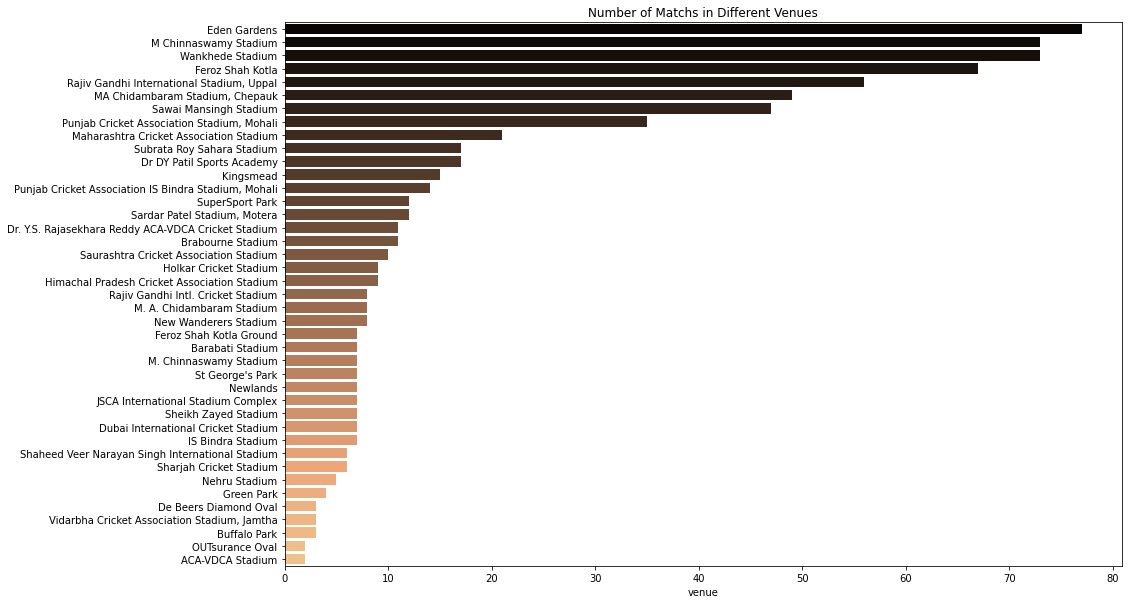

In [21]:
venues= df_match.venue.value_counts()
plt.figure(figsize=(15,10))
sns.barplot(y= venues.index, x= venues, orient='h', palette="copper");
plt.title("Number of Matchs in Different Venues")
plt.show()

**Eden Gardens** is one with most number of matches followed by **M chinnaswamy Stadium** and **Wankhede Stadium**

**Number of Matches Played by each Team**

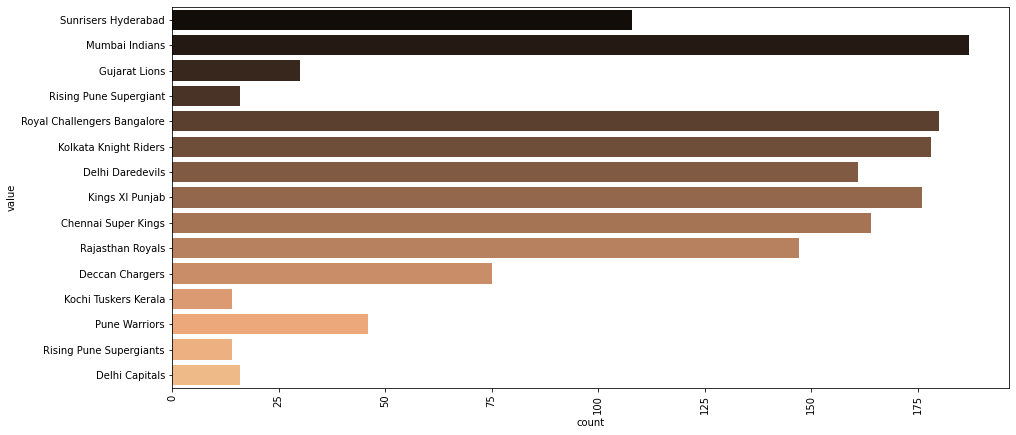

In [22]:
teams = pd.melt(df_match, id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(15,7))
sns.countplot(y='value', data=teams,palette='copper')
plt.xticks(rotation='vertical')
plt.show()

**Mumbai Indians** has played most number of Matches

**Number of Wins per Team**

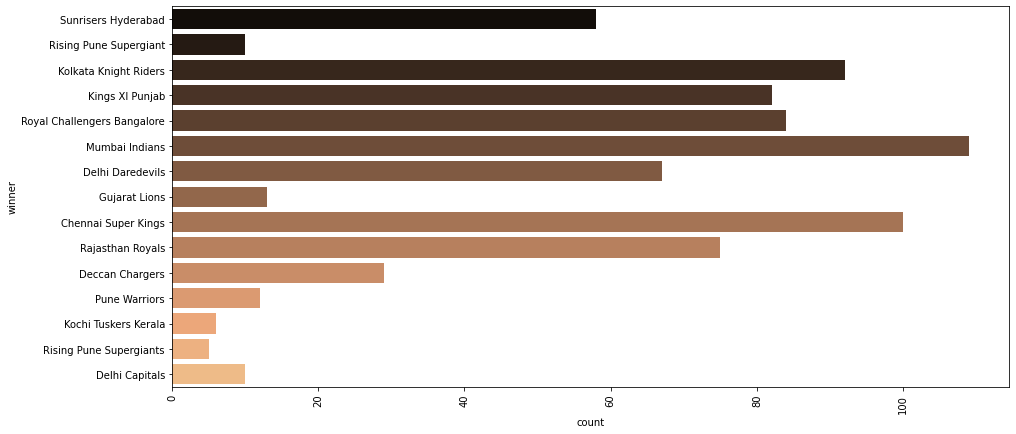

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(y='winner', data=df_match,palette='copper')
plt.xticks(rotation=90)
plt.show()

**Mumbai Indians** has won most number of Wins followed by **Chennai Super Kings**

**Champions each Season**

In [24]:
df = df_match.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


**Toss Decision :**

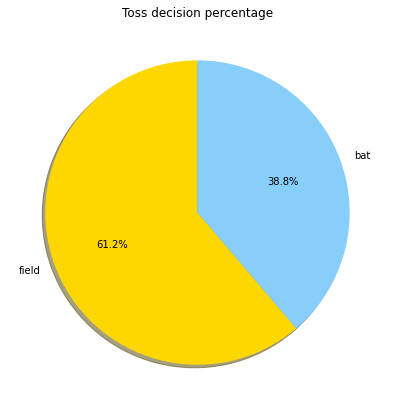

In [25]:
series = df_match.toss_decision.value_counts()
labels = (np.array(series.index))
sizes = (np.array((series / series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.figure(figsize=(15,7))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

61.2% of Toss desicionis Fielding

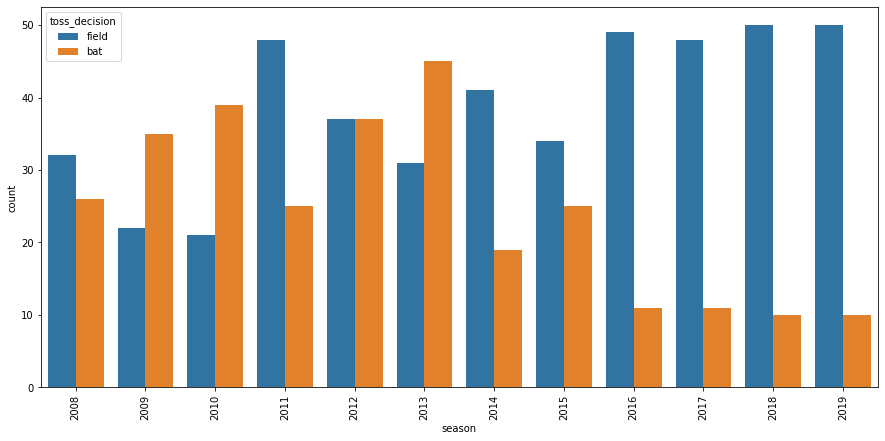

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(x='season', hue='toss_decision', data=df_match)
plt.xticks(rotation='vertical')
plt.show()

It seems during the initial years, Teams wanted to bat first.

Look at the 2016 season, most of the toss decisions are to field first.



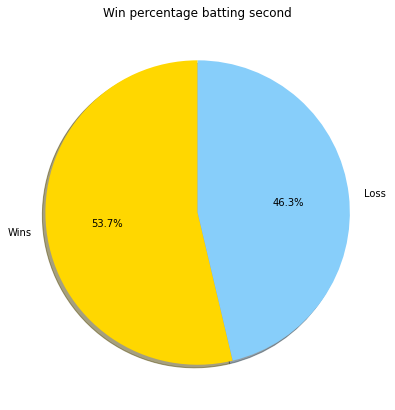

In [27]:
# Since there is a very strong trend towards batting second let us see the win percentage of teams batting second.
num_of_wins = (df_match.win_by_wickets>0).sum()
num_of_loss = (df_match.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.figure(figsize=(15,7))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

So percentage of times teams batting second has won is **53.7**%. Now let us split this by year and see the distribution.

**Top Umpires** :

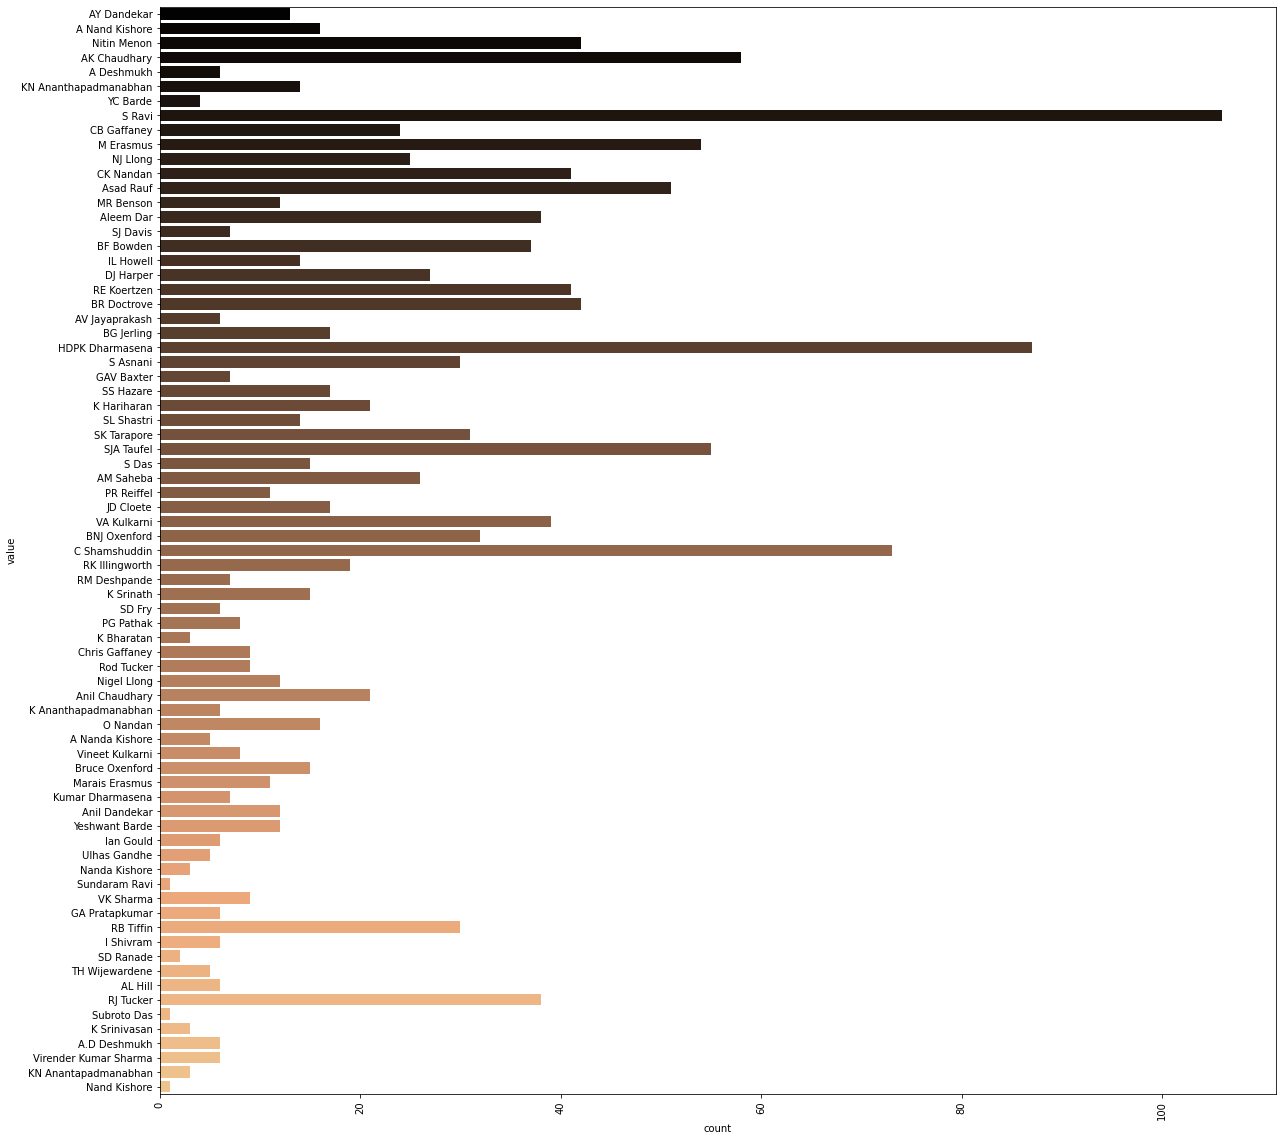

In [28]:
umpires = pd.melt(df_match, id_vars=['id'], value_vars=['umpire1', 'umpire2'])
plt.figure(figsize=(20,20))
sns.countplot(y='value', data=umpires,palette='copper')
plt.xticks(rotation='vertical')
plt.show()

**S Ravi** is the mostly selected umpires followed by **HDPK Dharamsena**

# Score Data Set

In [29]:
df_score.head(20)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


**Top scorer in IPL**

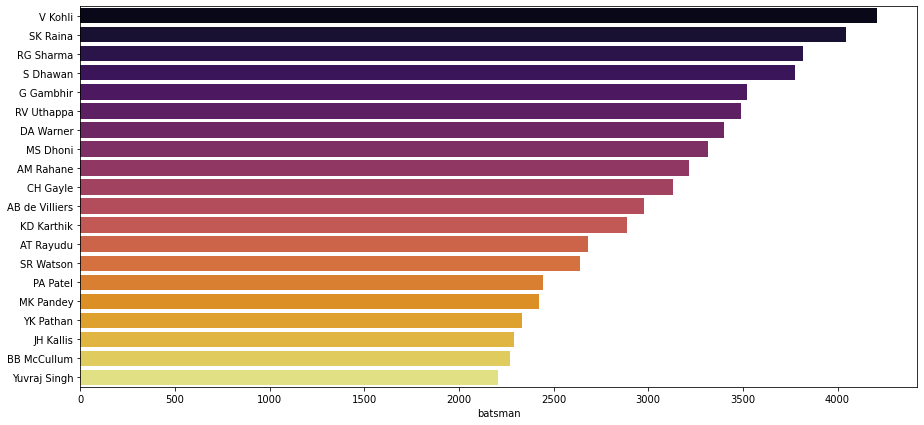

In [30]:
plt.figure(figsize=(15,7))
boundary= df_score.batsman.value_counts()[:20]
sns.barplot(y = boundary.index, x = boundary, orient='h',palette='inferno')
plt.show()

In [31]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

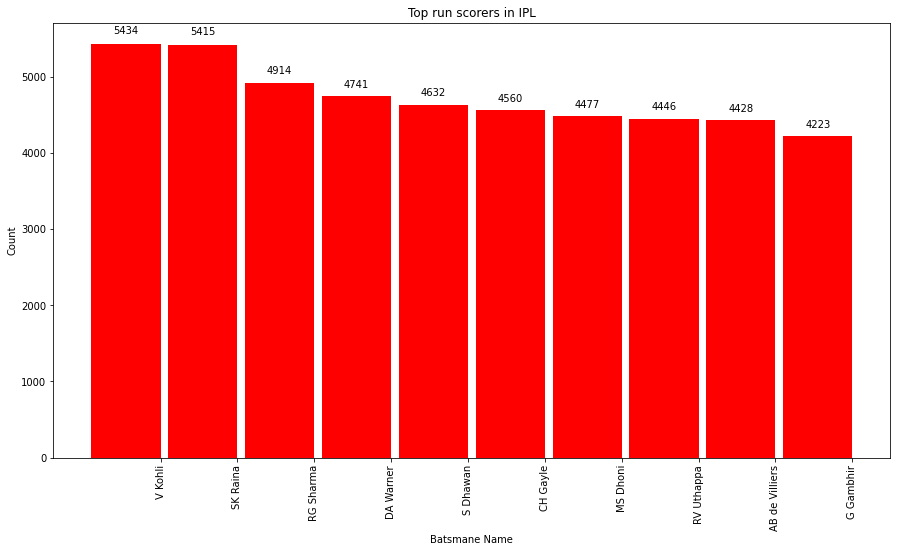

In [32]:
batsman = df_score.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman = batsman.iloc[:10,:]

labels = np.array(batsman['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(batsman['batsman_runs']), width=width, color='red')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

**Virat Kohli** is the Top scorer in IPL

**Top Boundary Scorer**

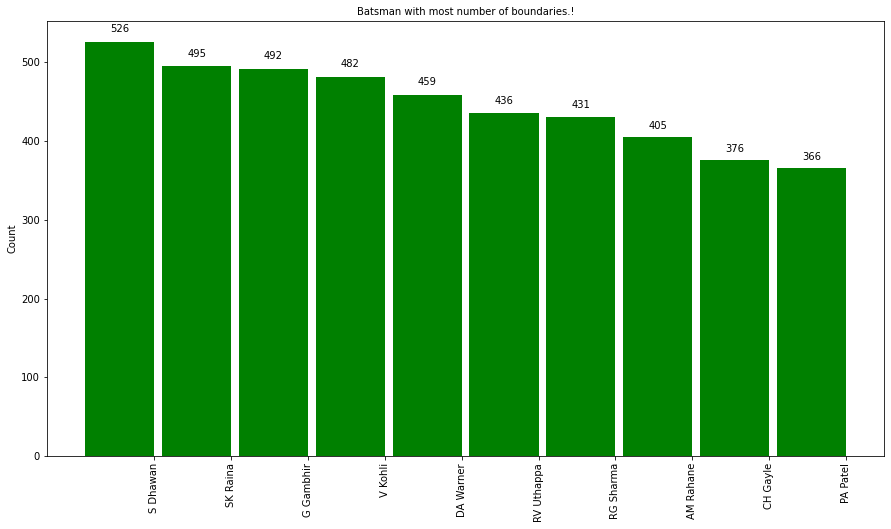

In [33]:
boundaries = df_score.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
boundaries = boundaries.iloc[:10,:]

labels = np.array(boundaries['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(boundaries['batsman_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
autolabel(rects)
plt.show()

**Shikhar Dhawan** is the Top Boundary scorer



**Most Sixes :**

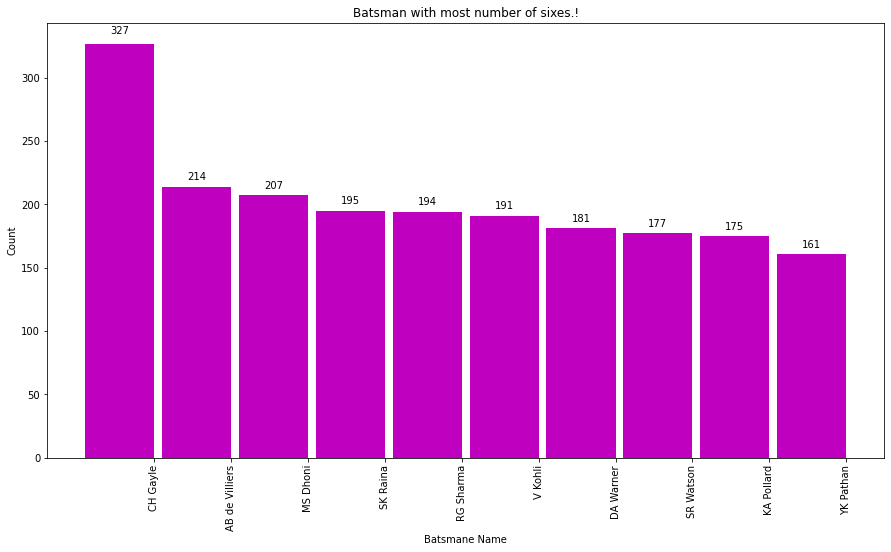

In [34]:
sixes = df_score.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
sixes = sixes.iloc[:10,:]

labels = np.array(sixes['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(sixes['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

**Chris Gayle** has topped the List for number of sixes 

**Most Dot Balls :**

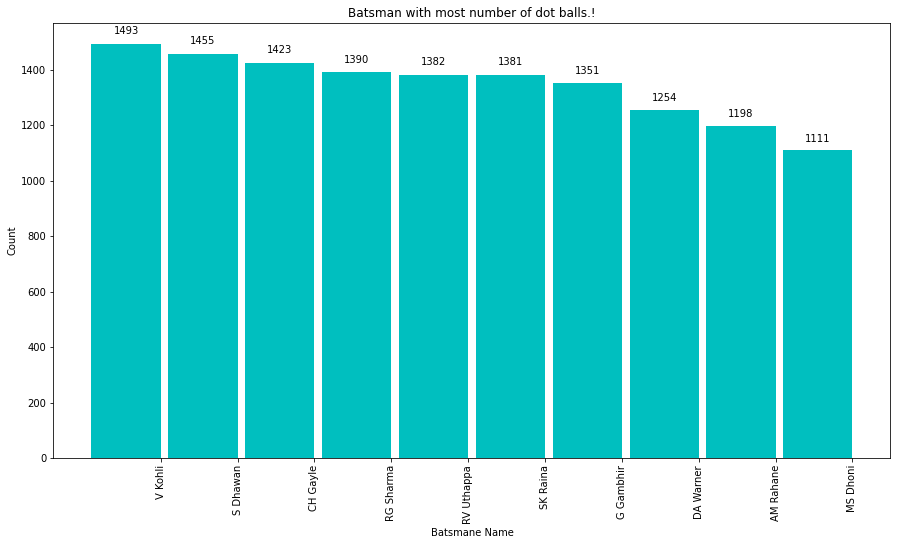

In [35]:
dotball = df_score.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
dotball = dotball.iloc[:10,:]

labels = np.array(dotball['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(dotball['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

Surprisingly  ...**Virat Kohli** has most dot balls

**Top Bowlers :**

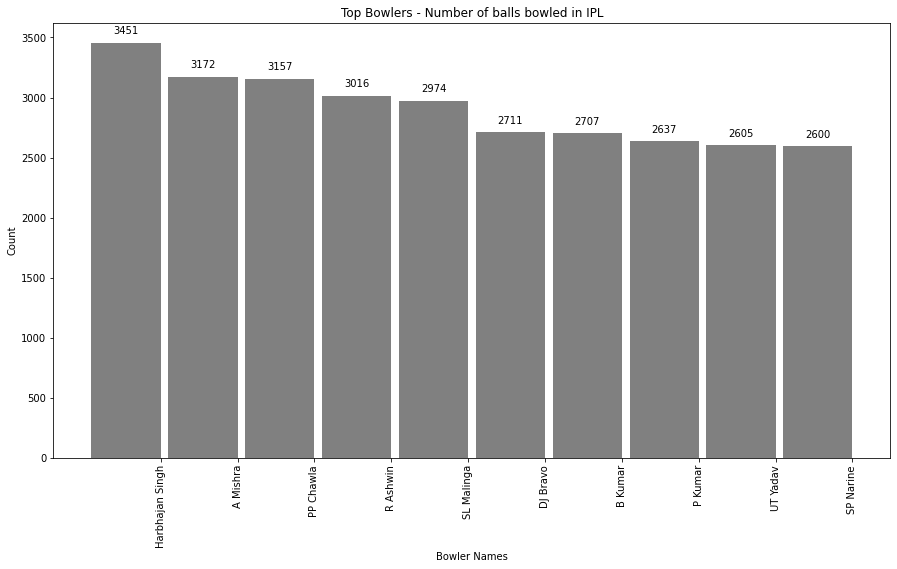

In [36]:
bowler = df_score.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
bowler = bowler.iloc[:10,:]

labels = np.array(bowler['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(bowler['ball']), width=width, color='grey')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

**Harbajan Singh** has bowled most balls in IPL

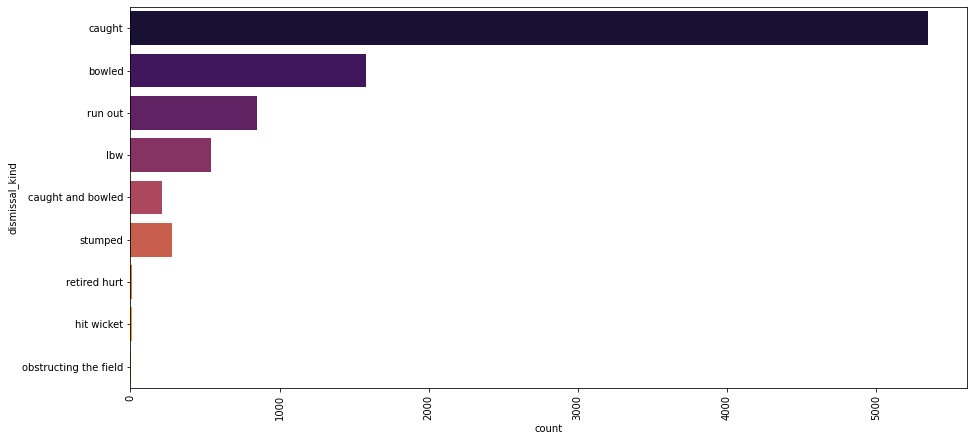

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(y='dismissal_kind', data=df_score,palette='inferno')
plt.xticks(rotation='vertical')
plt.show()

Most Dismissal are of **CAUGHT** type in IPL

# End of Task 5